Exercise: House price prediction - predict the price of the house (SalesPrice)
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Take log transformation on SalesPrice. Find rmse and R2 scores. 


In [1]:
import pandas as pd
import numpy as np
from sklearn import *
import matplotlib.pyplot as plt
%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")
del df["Id"]
df = df[~df.SalesPrice.isna()]
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalesPrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,Inside,Gtl,...,0,None,None,None,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,FR2,Gtl,...,0,None,None,None,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,Inside,Gtl,...,0,None,None,None,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,Corner,Gtl,...,0,None,None,None,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,FR2,Gtl,...,0,None,None,None,0,12,2008,WD,Normal,250000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 no

In [7]:
target = "SalesPrice"
y = np.log(df[target]) #outcome variable
X = df.copy() #feature matrix
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LinearRegression())
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training r2:", metrics.r2_score(y_train, y_train_pred),
      "\ntesting r2:", metrics.r2_score(y_test, y_test_pred),
      "\ntraining mse:", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred))

training r2: 0.9494583099988966 
testing r2: 0.8057913543146596 
training mse: 0.007406781500957719 
testing mse: 0.03670339331880269


In [29]:
target = "SalesPrice"
y = np.log(df[target]) #outcome variable
X = df.copy() #feature matrix
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.Lasso(alpha=0.01, random_state=1))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training r2:", metrics.r2_score(y_train, y_train_pred),
      "\ntesting r2:", metrics.r2_score(y_test, y_test_pred),
      "\ntraining mse:", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred))

training r2: 0.8940480673803641 
testing r2: 0.8785389987905549 
training mse: 0.015527039450020465 
testing mse: 0.022954852934347732


In [30]:
X.shape

(1460, 258)

In [31]:
est = pipe.steps[-1][-1]
pd.DataFrame({"coef": est.coef_, 
    "param": X.columns}).sort_values("coef", ascending = False).query("coef>0").shape

(32, 2)

In [68]:
target = "SalesPrice"
y = np.log(df[target]) #outcome variable
X = df.copy() #feature matrix
del X[target]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                        test_size = 0.3, random_state = 1234)
X_train.shape, X_test.shape

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.SGDRegressor(loss="huber"
                                      , tol = 1e-3
                                      , l1_ratio = 1.0
                                      , penalty="elasticnet"
                                      , alpha=0.001
                                      , random_state=1))
])

pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)


print("training r2:", metrics.r2_score(y_train, y_train_pred),
      "\ntesting r2:", metrics.r2_score(y_test, y_test_pred),
      "\ntraining mse:", metrics.mean_squared_error(y_train, y_train_pred),
      "\ntesting mse:", metrics.mean_squared_error(y_test, y_test_pred))

training r2: 0.8176044010788995 
testing r2: 0.8279975011725185 
training mse: 0.029635572916399452 
testing mse: 0.026162297230921467


In [64]:
np.random.seed(1234)
np.random.ranf(3)

array([0.19151945, 0.62210877, 0.43772774])

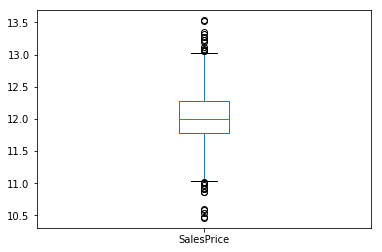

In [66]:
pd.Series(y).plot.box()

In [73]:
%%time

scores = model_selection.cross_val_score(cv=5
                                , estimator=pipe
                                , n_jobs=4
                                , scoring="r2"
                                , X=X_train
                                , y= y_train)


print("mean score: ", np.mean(scores), scores)

mean score:  0.7899790025201057 [0.74594029 0.81284489 0.7209228  0.85169383 0.8184932 ]
CPU times: user 70.9 ms, sys: 38.4 ms, total: 109 ms
Wall time: 1.12 s


In [83]:
%%time 
param_grid = {
    "est__l1_ratio": np.linspace(0, 1, 10),
    "est__alpha": 10 ** np.linspace(-4, -2, 5)
}

gsearch = model_selection.GridSearchCV(cv=5, 
                                       estimator=pipe, 
                                       n_jobs=1, 
                                       param_grid=param_grid)
gsearch.fit(X_train, y_train)


CPU times: user 1min 24s, sys: 569 ms, total: 1min 25s
Wall time: 1min 25s


In [74]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [75]:
10 ** np.linspace(-4, -2, 5)

array([0.0001    , 0.00031623, 0.001     , 0.00316228, 0.01      ])

In [84]:
gsearch

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', SGDRegressor(alpha=0.001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1...       power_t=0.25, random_state=1, shuffle=True, tol=0.001, verbose=0,
       warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'est__l1_ratio': array([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, 0.88889, 1.     ]), 'est__alpha': array([0.0001 , 0.00032, 0.001  , 0.00316, 0.01   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
gsearch.best_score_

0.8397882116440984

In [86]:
gsearch.best_params_

{'est__alpha': 0.0001, 'est__l1_ratio': 0.5555555555555556}

In [87]:
gsearch.best_estimator_

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=1, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.5555555555555556,
       learning_rate='invscaling', loss='huber', max_iter=None,
       n_iter=None, penalty='elasticnet', power_t=0.25, random_state=1,
       shuffle=True, tol=0.001, verbose=0, warm_start=False))])

In [88]:
import pickle

In [89]:
with open("kaggle.model", "wb") as f:
    pickle.dump(gsearch.best_estimator_, f)

In [90]:
with open("kaggle.model", "rb") as f:
    est = pickle.load(f)

In [92]:
y_test_pred = est.predict(X_test)

In [93]:
metrics.r2_score(y_test, y_test_pred)

0.8093131759799814

Done!

In [94]:
fstats, pvals = feature_selection.f_regression(X, y)

- pval - lower indicates the feature is more significant predictor
- pval threshold is 0.01
- HA: feature is related to the outome by chance. p_val provides evidence for the H0(alternative hypothesis). Lower pval is the stronger evidence for H0.

In [98]:
pd.DataFrame({"feature": X.columns, "pval": pvals}).query("pval<0.01").sort_values("pval").iloc[:10, :]

,feature,pval
3,OverallQual,0.000000e+00
15,GrLivArea,3.060209e-216
25,GarageCars,3.093756e-199
26,GarageArea,1.106255e-176
11,TotalBsmtSF,7.534551e-151
12,1stFlrSF,1.074698e-141
151,ExterQual_TA,4.749723e-141
18,FullBath,2.118958e-140
5,YearBuilt,1.103567e-135
24,GarageYrBlt,7.405437e-126
